this notebook is for explanation of codes and documentation later on... all codes used here are example codes

what is the minimax alogorithm?

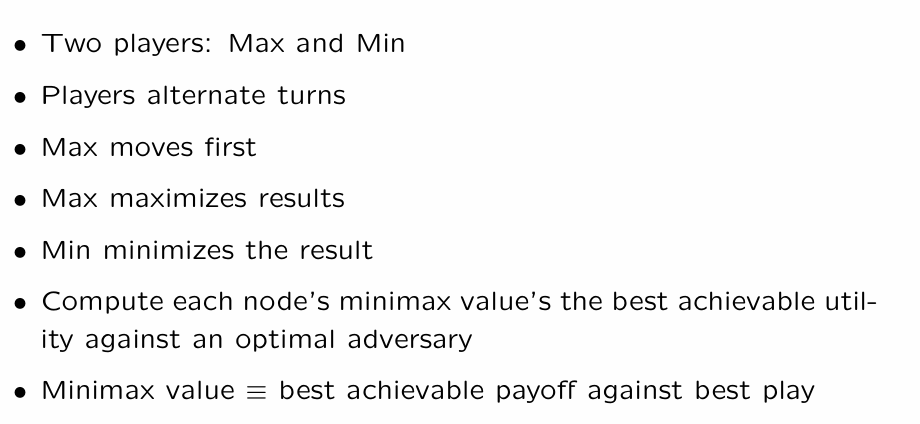

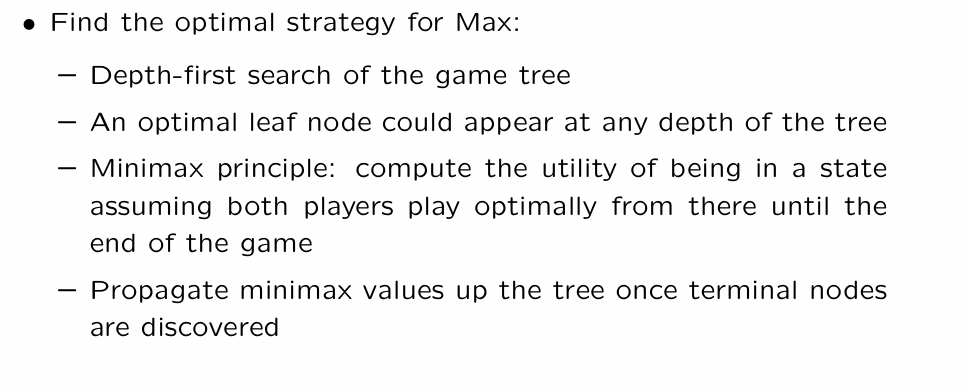

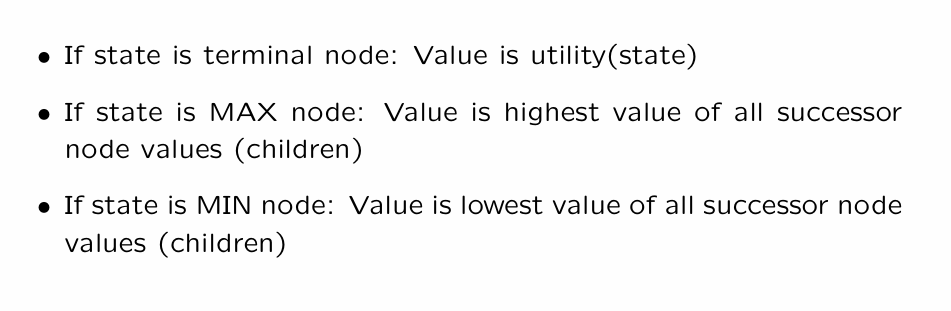

pseudo code
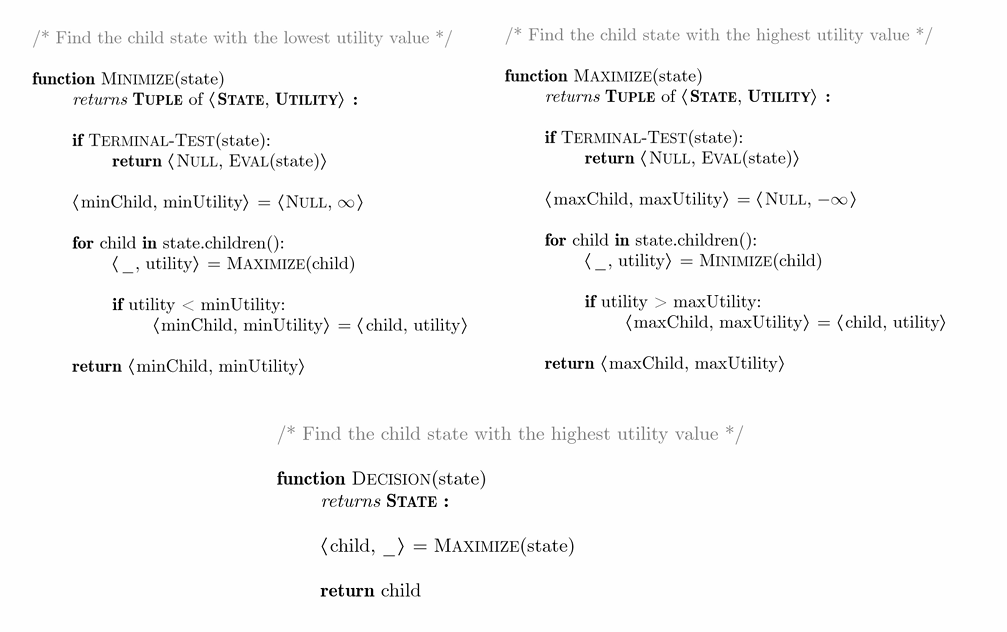

sample implementation of the pseudocode just for illustration purposes

In [ ]:
import math

# Define constants for players
PLAYER = 1  # Maximizing player
OPPONENT = -1  # Minimizing player
EMPTY = 0  # Empty cell in the game board

# Sample evaluation function to score the board state
def evaluate(board):
    # This is a dummy function that returns a random evaluation score for the board
    # You would replace this with a proper heuristic function for games like Connect Four
    return sum(sum(row) for row in board)

# Check if a board state is terminal (i.e., win or draw)
def is_terminal(board):
    # Replace with the actual logic to determine if the game is over
    # For example, checking for a win or if the board is full (draw)
    return False

# Generate all possible moves from the current board state
def get_valid_moves(board):
    # Replace this with actual logic to return a list of possible moves
    # For example, the index of columns in Connect Four that are not full
    return [i for i in range(len(board[0])) if board[0][i] == EMPTY]

# Apply a move to the board and return the new board state
def apply_move(board, col, player):
    # Make a deep copy of the board
    new_board = [row[:] for row in board]
    # Drop the piece in the specified column
    for row in reversed(new_board):
        if row[col] == EMPTY:
            row[col] = player
            break
    return new_board

# Minimax function with depth parameter
def minimax(board, depth, maximizing_player):
    # Check for terminal node or maximum depth reached
    if depth == 0 or is_terminal(board):
        return evaluate(board)

    if maximizing_player:
        max_eval = -math.inf
        for move in get_valid_moves(board):
            new_board = apply_move(board, move, PLAYER)
            eval = minimax(new_board, depth - 1, False)
            max_eval = max(max_eval, eval)
        return max_eval
    else:
        min_eval = math.inf
        for move in get_valid_moves(board):
            new_board = apply_move(board, move, OPPONENT)
            eval = minimax(new_board, depth - 1, True)
            min_eval = min(min_eval, eval)
        return min_eval

# Example usage of minimax
def find_best_move(board, depth):
    best_move = None
    best_value = -math.inf

    for move in get_valid_moves(board):
        new_board = apply_move(board, move, PLAYER)
        move_value = minimax(new_board, depth - 1, False)

        if move_value > best_value:
            best_value = move_value
            best_move = move

    return best_move


assignment breakdown
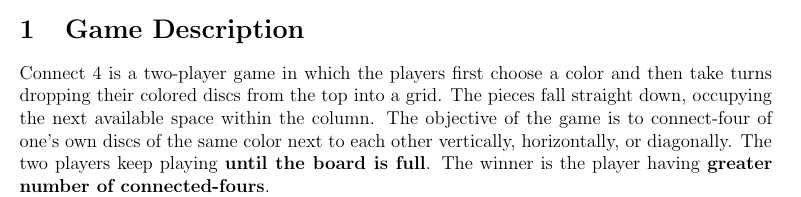

the game ends only when the board is full. we must calculate the number of connect fours horizontally, vertically, and diagonally.

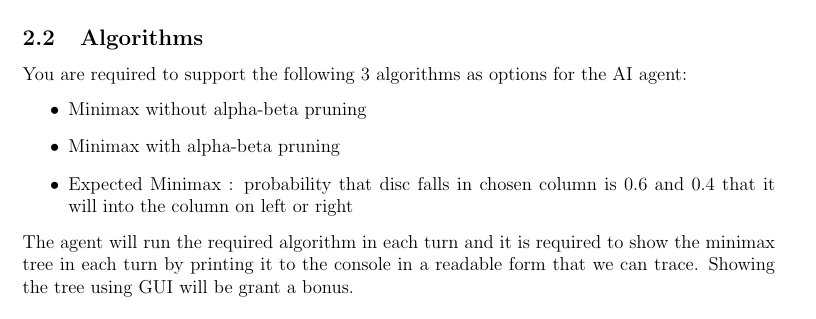

required three variations of the algorithm and also we must print the tree in the console
to optimize memeory usage we are to avoid "two dimensional arrays". we might use a integers to store the board states. below is a sample illustration of how to do so.

In [ ]:
class ConnectFourBitboard:
    def __init__(self):
        # Initialize empty bitboards for each player
        self.player1_board = 0  # Represents pieces for player 1
        self.player2_board = 0  # Represents pieces for player 2
        self.current_player = 1  # Start with player 1
        self.height = [0] * 7  # Track the height of each column (for adding pieces)


self.player1_board and self.player2_board: Each player has their own bitboard stored as a single integer. Each bit in this integer represents whether there’s a piece in that slot (1) or not (0).

self.current_player: Tracks which player’s turn it is, starting with player 1.

self.height: A list of integers, one for each column, that tracks how high pieces have been stacked in each column. This helps us identify where the next piece will go in a given column.

In [ ]:
def drop_piece(self, column):
    """Drop a piece in the given column for the current player."""
    col_mask = 1 << (column * 7 + self.height[column])


col_mask: This line calculates the position of the bit that corresponds to the next available spot in the specified column.

column * 7: There are 7 rows reserved for each column, so multiplying by 7 moves to the starting bit of the desired column.
+ self.height[column]: Adds the height of the pieces in that column to position the bit for the next available row.
1 << (column * 7 + self.height[column]): The 1 << operator shifts a 1 to the exact bit location where the piece should be placed.

In [ ]:
if self.current_player == 1:
    self.player1_board |= col_mask
else:
    self.player2_board |= col_mask


self.player1_board |= col_mask: If it’s player 1’s turn, this line uses bitwise OR (|=) to add the piece to player1_board.

self.player2_board |= col_mask: Similarly, if it’s player 2’s turn, this line adds the piece to player2_board.

python
Copy code


In [ ]:
self.height[column] += 1


Increment Height: After placing the piece, we update the column height by 1 to reflect the newly occupied spot.

In [ ]:
self.current_player = 3 - self.current_player


Switch Player: This line alternates the current player by subtracting from 3 (i.e., 3 - 1 is 2 and 3 - 2 is 1), switching between players after each move.
python
Copy code


In [ ]:
def display(self):
    """Print the board in a human-readable format."""
    board = [[0] * 7 for _ in range(6)]
    for row in range(6):
        for col in range(7):
            pos = 1 << (col * 7 + row)
            if self.player1_board & pos:
                board[5 - row][col] = 1
            elif self.player2_board & pos:
                board[5 - row][col] = 2
    for row in board:
        print(" ".join(str(cell) for cell in row))
    print()


board = [[0] * 7 for _ in range(6)]: Creates a 2D list (6 rows by 7 columns) filled with zeros to represent an empty board for display.

Loop through each cell in the grid:

pos = 1 << (col * 7 + row): Calculates the bit position corresponding to each cell.
self.player1_board & pos: Checks if there is a piece for player 1 at this position. If so, sets board[5 - row][col] = 1 (5 - row makes it bottom-up for printing).
self.player2_board & pos: Checks if there is a piece for player 2 at this position and sets board[5 - row][col] = 2 if found.
Display the board: This prints each row, with pieces represented as 1 (player 1) or 2 (player 2).

python
Copy code


what is to implement this bitwise approach to the algorithm

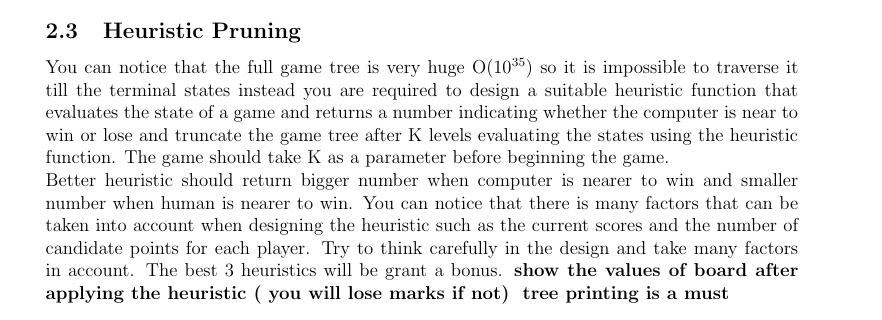

an evaluation heuristic must be applied check the attached research paper

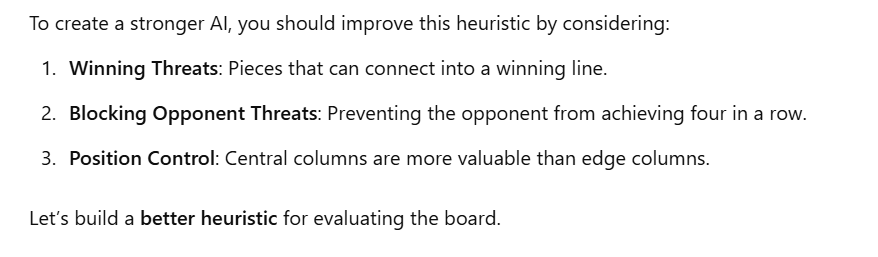